<a href="https://colab.research.google.com/github/asepmuhidin/BD-DM-C01/blob/main/util_2005_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
drive.mount('/mnt')

Mounted at /mnt


In [ ]:
pfile="/mnt/MyDrive/factory/util-2005-2025.xlsx"
df=pd.read_excel(pfile, parse_dates=['BPBDate'] )
df.head()

,BPBNo,BPBDate,SPKNo,ItemID,ItemDesc,QtyUtil,ItemCost,ItemType,TypeDesc
0,M006821,2005-01-03,PHC,0C12-PL065,"PLASTIK KARTU 5,8 x 9 Cm / 40 mic.",2.8,22248.50,11.0,PLASTIK PACKING
1,M006822,2005-01-03,REPRO,0B23-DVPOS,FUJI PLATE DEVELOPER POSITIVE,5.0,25031.47,19.0,CHEMICAL
2,M006822,2005-01-03,REPRO,0B23-TERGU,THERMO GUM PP1002,5.0,84225.00,19.0,CHEMICAL
3,M006822,2005-01-03,REPRO,0B41-PO510,PLATE OFFSET FUJI Uk. 510x400x0.15,100.0,8244.44,33.0,PLATE OFFSET
4,M006823,2005-01-03,NaN,0B01-SP989,FILM GRD KODAK SP989-LDF Uk. 459mm X 60 M,1.0,1344915.00,1.0,FILM


In [ ]:
df.describe()

,BPBDate,QtyUtil,ItemCost,ItemType
count,160280,1.602800e+05,1.602800e+05,160250.000000
mean,2015-03-22 12:02:28.240579072,1.444190e+04,1.969960e+05,17.156637
min,2005-01-03 00:00:00,5.000000e-03,0.000000e+00,0.000000
25%,2010-08-05 00:00:00,3.710000e+00,5.000000e+03,5.000000
50%,2014-12-06 00:00:00,1.800000e+01,2.398941e+04,11.000000
75%,2019-11-11 00:00:00,1.251000e+02,8.164894e+04,21.000000
max,2025-05-05 00:00:00,2.992000e+07,2.023891e+08,49.000000
std,NaN,1.854920e+05,1.477993e+06,13.565846


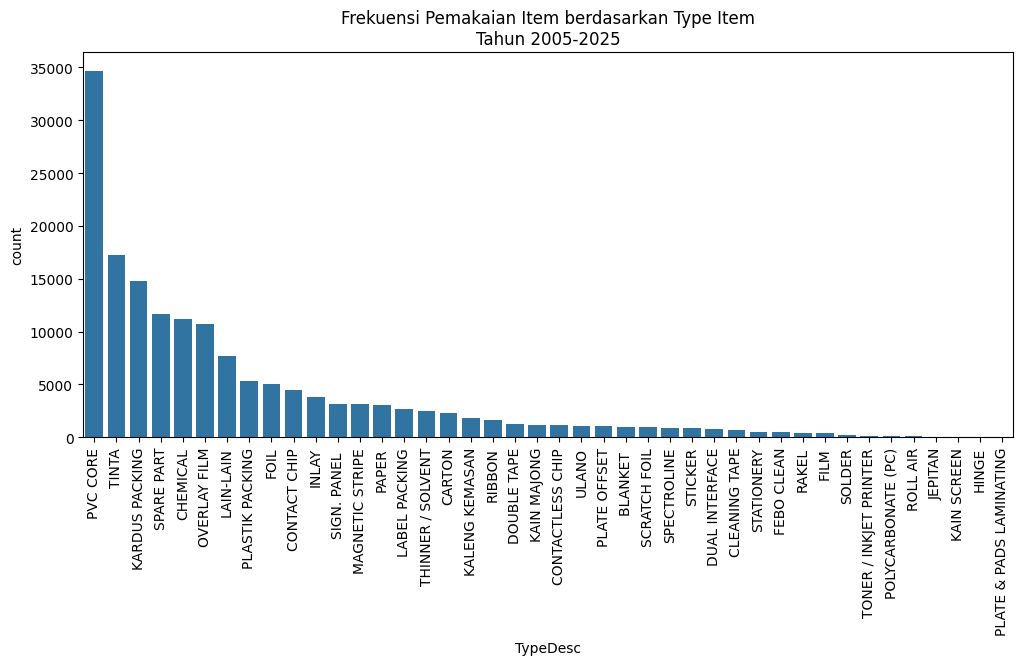

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='TypeDesc',data=df, order=df['TypeDesc'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Frekuensi Pemakaian Item berdasarkan Type Item\nTahun 2005-2025')
plt.show()

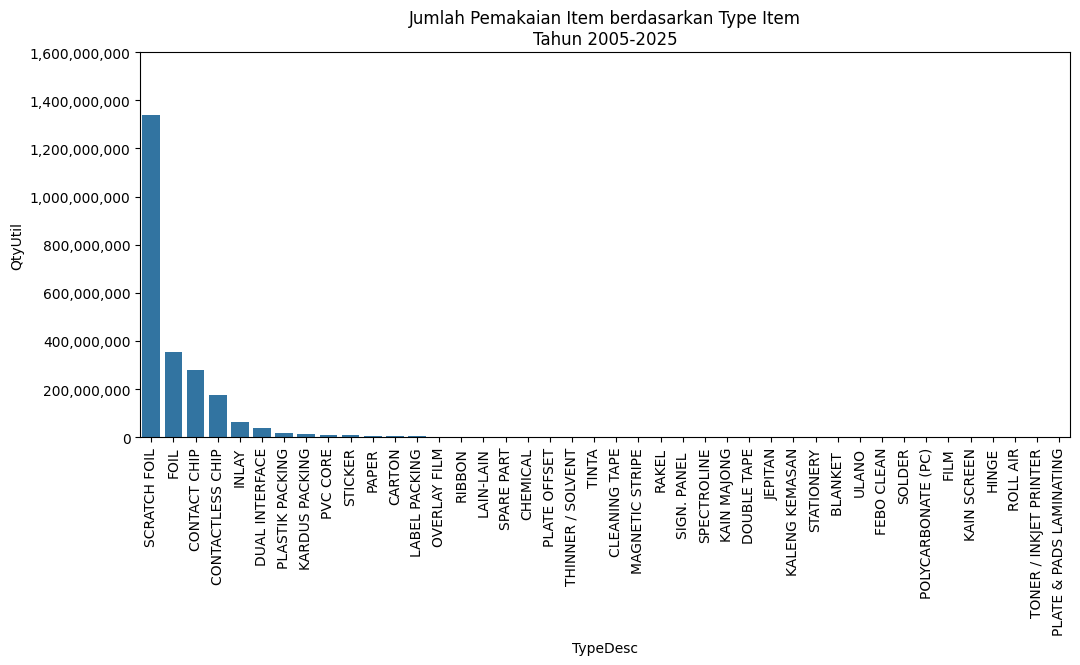

In [ ]:
plt.figure(figsize=(12,5))
grouped_df = df.groupby('TypeDesc').agg({'QtyUtil': 'sum', 'ItemCost': 'sum'})
sns.barplot(x=grouped_df.index, y=grouped_df['QtyUtil'], order=grouped_df['QtyUtil'].sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(current_values)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Jumlah Pemakaian Item berdasarkan Type Item\nTahun 2005-2025');

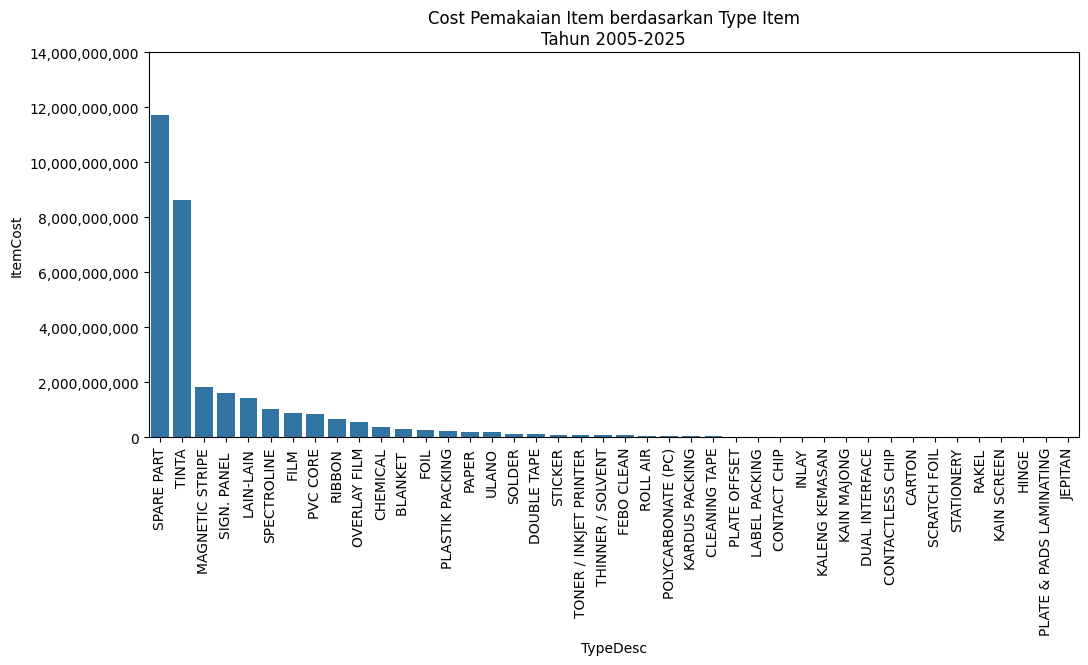

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=grouped_df.index, y=grouped_df['ItemCost'], order=grouped_df['ItemCost'].sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(current_values)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Cost Pemakaian Item berdasarkan Type Item\nTahun 2005-2025');

In [ ]:
kode_chip=[41,42,43,46]
df_chip=df[df['ItemType'].isin(kode_chip)]
df_chip.head()


,BPBNo,BPBDate,SPKNo,ItemID,ItemDesc,QtyUtil,ItemCost,ItemType,TypeDesc
23969,M018313,2008-08-26,NaN,0A04-PRELC,Infineon Mifare 1K (SLE66R35) MCC8-2-3,32.0,2721.38,42.0,CONTACTLESS CHIP
24033,M018342,2008-08-27,NaN,0A04-PRELC,Infineon Mifare 1K (SLE66R35) MCC8-2-3,32.0,2721.38,42.0,CONTACTLESS CHIP
24368,M018485,2008-09-10,NaN,0A04-PRELC,Infineon Mifare 1K (SLE66R35) MCC8-2-3,16.0,2721.38,42.0,CONTACTLESS CHIP
25497,M018965,2008-11-05,NaN,0A04-PRELD,NXP Mifare 4K (MF1 IC S70) MOA4,1024.0,5501.64,42.0,CONTACTLESS CHIP
26222,M019293,2008-12-15,NaN,0A04-PRELD,NXP Mifare 4K (MF1 IC S70) MOA4,7568.0,5501.64,42.0,CONTACTLESS CHIP


In [ ]:
df_chip_group=df_chip.groupby('TypeDesc').agg({'QtyUtil': 'sum', 'ItemCost': 'sum'})
df_chip_group

,QtyUtil,ItemCost
TypeDesc,,
CONTACT CHIP,278041183.0,1.353858e+07
CONTACTLESS CHIP,176053184.0,5.137253e+06
DUAL INTERFACE,36940286.0,5.845239e+06
INLAY,64873424.0,9.654420e+06


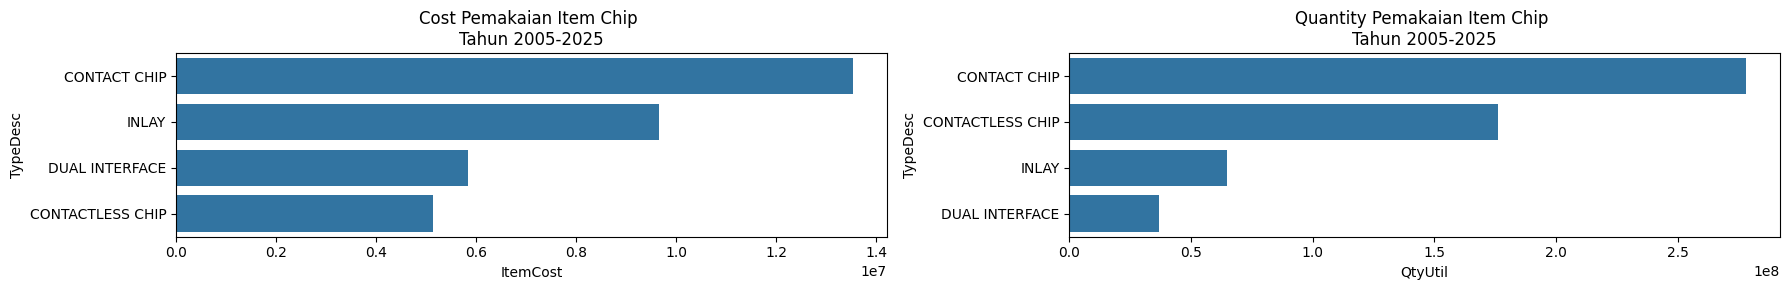

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,3))
sns.barplot(y=df_chip_group.index, x=df_chip_group['ItemCost'], order=df_chip_group['ItemCost'].sort_values(ascending=False).index, ax=ax[0])
sns.barplot(y=df_chip_group.index, x=df_chip_group['QtyUtil'], order=df_chip_group['QtyUtil'].sort_values(ascending=False).index, ax=ax[1])
ax[0].set_title('Cost Pemakaian Item Chip \nTahun 2005-2025')
ax[1].set_title('Quantity Pemakaian Item Chip \nTahun 2005-2025')
plt.tight_layout()
plt.show();

In [ ]:
df_chip_groupdate=df_chip.groupby([df_chip['BPBDate'].dt.year ,'TypeDesc']).agg({'QtyUtil': 'sum', 'ItemCost': 'sum'})
df_chip_groupdate.head()

QtyUtil   ItemCost
BPBDate TypeDesc                             
2008    CONTACTLESS CHIP   29376.0   49338.12
2009    CONTACTLESS CHIP  839313.0   79448.97
        INLAY             823569.0    6519.05
2010    CONTACT CHIP        2500.0  122490.00
        CONTACTLESS CHIP  591913.0  257417.02

In [ ]:
df_chip_groupdate.index.get_level_values(0).max()

np.int32(2025)

In [ ]:
from matplotlib.ticker import MaxNLocator

def customplotgroup(plot, df,column, title, ax):
  plt.xticks(rotation=45)
  ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')
  ax.ticklabel_format(style='plain', axis='y')

  ax.set_ylim(bottom=df[column].min(), top=df[column].max())
  ax.set_xlim(left=df.index.get_level_values(0).min() , right=df.index.get_level_values(0).max())

  tahun_range = list(range(df.index.get_level_values(0).min(), df.index.get_level_values(0).max()+1))


  if plot=='line':
    sns.lineplot(data=df, x=df.index.get_level_values(0), y=column, hue=df.index.get_level_values(1),ax=ax)
    ax.set_xticks(ticks=tahun_range, labels=tahun_range , rotation=45)
  elif plot=='bar':
    sns.barplot(data=df, x=df.index.get_level_values(0), y=column, hue=df.index.get_level_values(1),ax=ax)
    #ax.set_xticks(labels=tahun_range,rotation=45)
  current_values = ax.get_yticks()
  ax.set_yticks(current_values)
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
  ax.set_title(title)


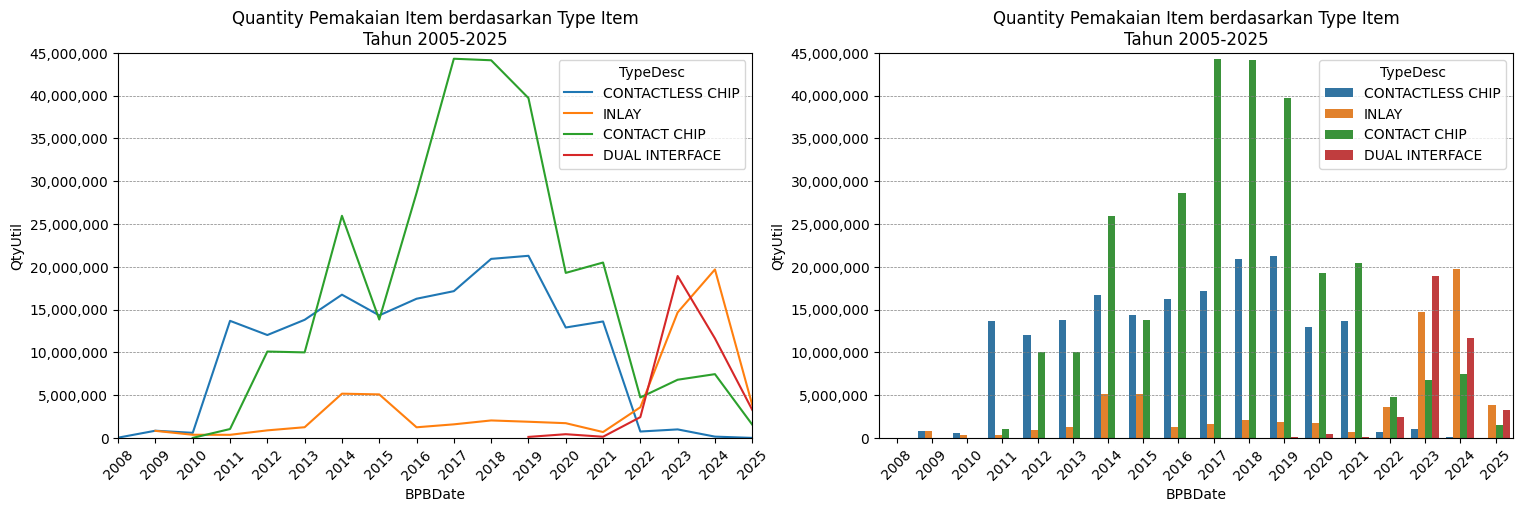

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,5))
customplotgroup(plot='line', df=df_chip_groupdate, column='QtyUtil', title='Quantity Pemakaian Item berdasarkan Type Item\nTahun 2005-2025', ax=ax[0])
customplotgroup(plot='bar', df=df_chip_groupdate, column='QtyUtil', title='Quantity Pemakaian Item berdasarkan Type Item\nTahun 2005-2025', ax=ax[1])